Utilizando 5 datasets trabalhados em aulas anteriores:
1. Carros
2. Vinhos
3. Titanic
4. Filmes
5. Senso_IBGE

escolha pelo menos 2 gráficos adequados para representar os resultados de seus insights para cada dataset acima e plote-os.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../bases de dados/titanic.csv', sep=',')
df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### distribuição do sexo masculino e feminino

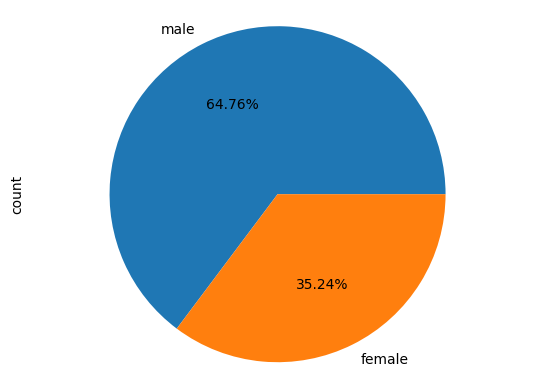

In [3]:
df.Sex.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');  # Para deixar o gráfico redondo

Distribuição do sexo: 64,76% masculino e 35.24% feminino

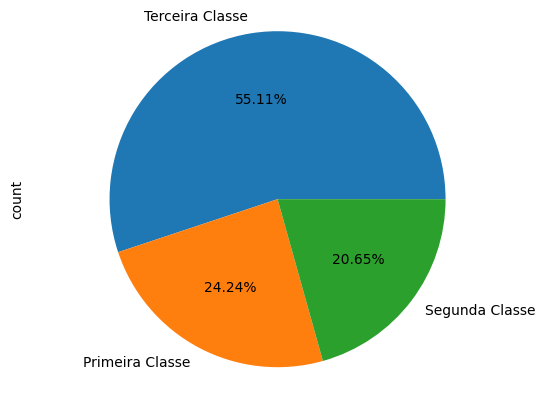

In [4]:
# Para trocar os valores numéricos pelos nomes nos gráficos
df['Pclass'] = df['Pclass'].replace({1: 'Primeira Classe', 2: 'Segunda Classe', 3: 'Terceira Classe'})

df.Pclass.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

Distribuição de pessoas por classe

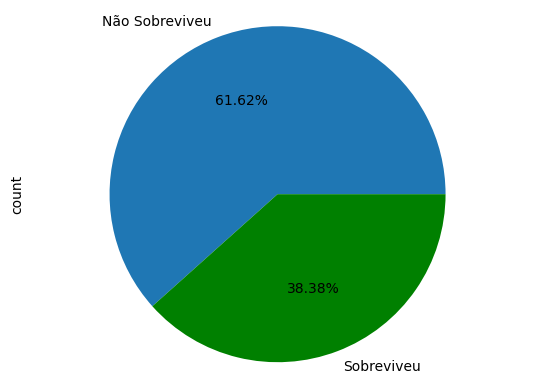

In [5]:
# Para trocar os valores numéricos pelos nomes nos gráficos
df['Survived'] = df['Survived'].replace({0: 'Não Sobreviveu', 1: 'Sobreviveu'})

colors = ['#1F77B4', 'green']
df.Survived.value_counts().plot(kind='pie', autopct='%.2f%%', colors=colors)
plt.axis('equal');

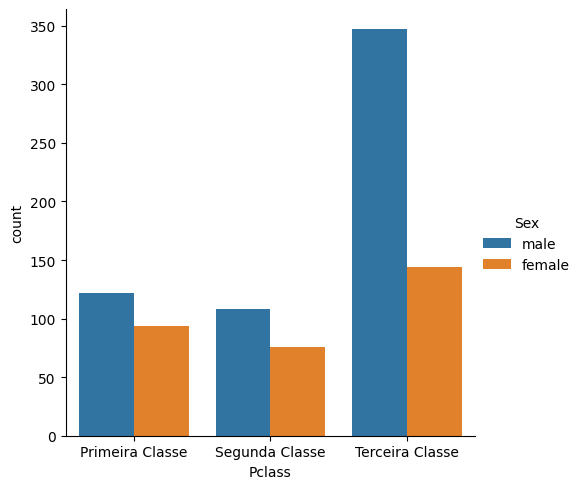

In [28]:
# Obs.: pelo cmd instale "pip install -U seaborn"
# Distribuição da classe dividida por sexo.
sns.catplot(x='Pclass', data=df, hue='Sex', kind='count', order=sorted(df['Pclass'].unique()));

Entre as classes, a primeira teve mais sobreviventes do que mortos, a segunda foi equilibrada e a terceira teve um número bem maior de morto.
Isso provavelmente é devido à posição das cabines com relação ao ponto de impacto do icerberg.

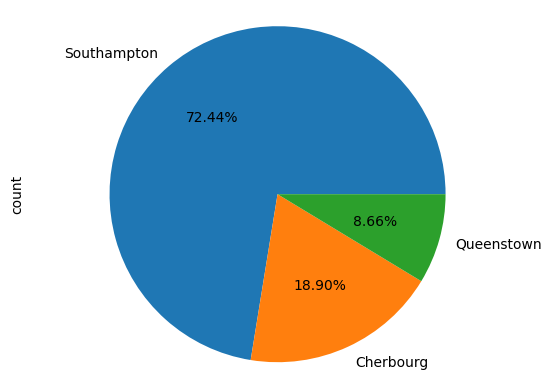

In [7]:
cidade_embarque = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

df.Embarked.map(cidade_embarque).value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

Analisando a cidade de embarque dos passageiros, a maioria embarcou em Southampton.

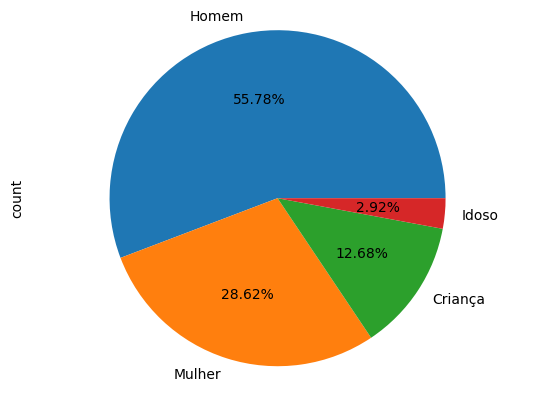

In [8]:
def agrupar_pessoas(linha):
    if linha['Age'] < 18:
        return 'Criança'
    elif linha['Age'] >= 60:
        return 'Idoso'
    elif linha['Sex'] == 'male':
        return 'Homem'
    else:
        return 'Mulher'
df['Grupo'] = df.apply(agrupar_pessoas, axis=1)
df.Grupo.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

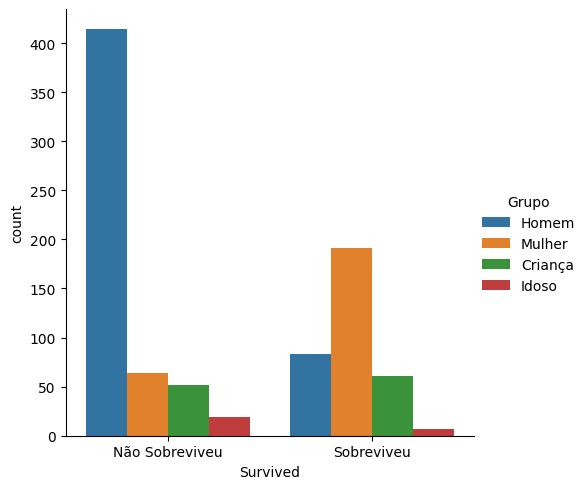

In [10]:
sns.catplot(x='Survived', data=df, hue='Grupo', kind='count').set_xticklabels(['Não Sobreviveu', 'Sobreviveu']);

O gráfico mostra que a taxa de mortalidade é muito maior entre os homens. Isso provavelmente é devido à política de “mulheres e crianças primeiro”.

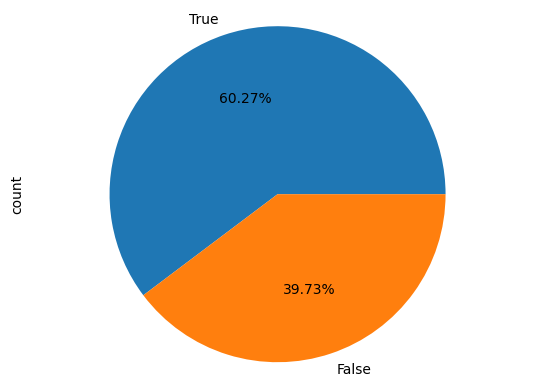

In [11]:
# Coluna membros da família = irmãos/parceiros + país/filhos.
df['Membros_familiar'] = df.SibSp + df.Parch
# Coluna dizendo se a pessoa está sozinho ou não.
df['Viaja_sozinho'] = df.Membros_familiar == 0

df.Viaja_sozinho.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

É possível ver que a maior parte das pessoas viajavam sozinhas.

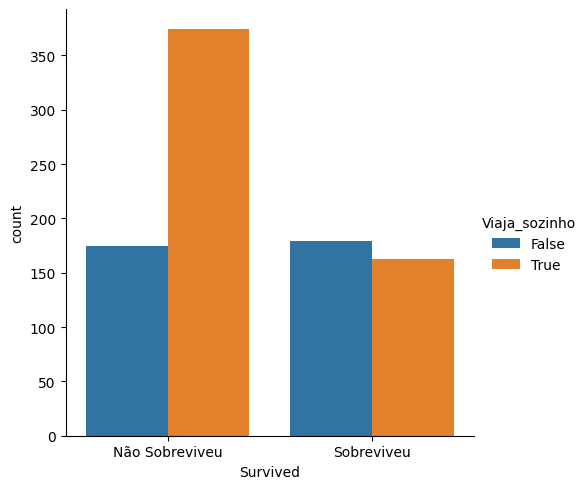

In [14]:
sns.catplot(x='Survived', data=df, hue='Viaja_sozinho', kind='count').set_xticklabels(['Não Sobreviveu', 'Sobreviveu']);

A taxa de mortalidade foi bem maior entre os que viajavam sozinhos.

Analisando os gráficos, o grupo que mais sobreviveu possui as seguintes características: está na primeira classe, é mulher e não viajava sozinha.